<a href="https://colab.research.google.com/github/Vaishali53-eng/financial-KPI-analysis-for-a-startup/blob/main/Cohort_analysis.%20ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('users_data FINAL.xlsx')

In [4]:
df.columns

Index(['id', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'gender', 'address', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards',
       'YEAR', 'MONTH', 'DAY', 'SIGNUP DATE', 'Signup_Month'],
      dtype='object')

In [5]:
df['Date'] = pd.to_datetime(df['SIGNUP DATE'])

In [7]:
#Cohort Month
df['CohortMonth'] = df['Date'].dt.to_period('M')
#Order Month
df['OrderMonth'] = df['Date'].dt.to_period('M')
#Customer age
from operator import attrgetter
df['CustomerAge'] = (df['OrderMonth'] - df['CohortMonth']).apply(attrgetter('n'))

In [9]:
# Example Revenue (dummy)
df['Revenue'] = df['yearly_income'] / 12
#Create cohort pivot table
cohort_data = df.groupby(['CohortMonth', 'CustomerAge'])['Revenue'].sum().reset_index()
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CustomerAge', values='Revenue')

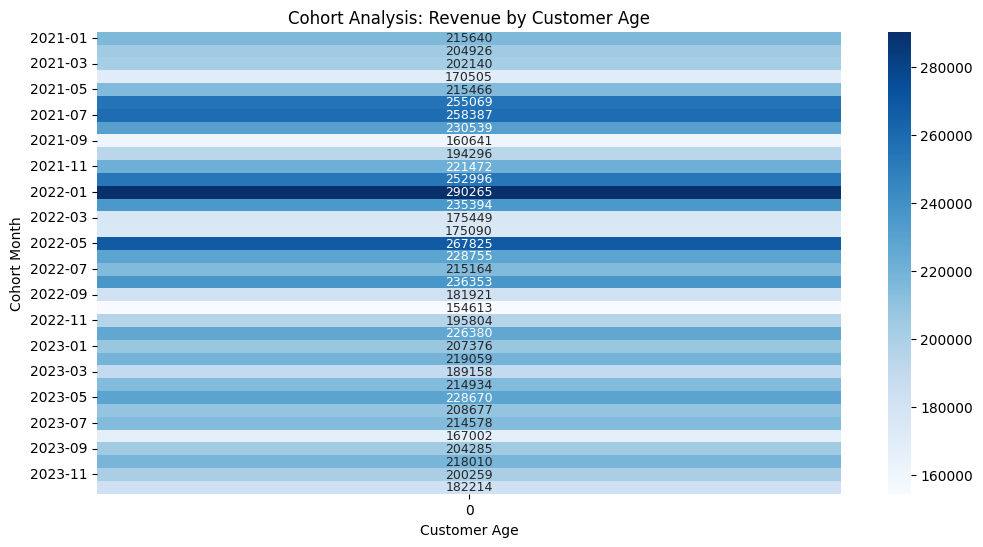

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(cohort_pivot.round(0), annot=True, fmt=".0f", cmap='Blues', annot_kws={"size": 9})
plt.title('Cohort Analysis: Revenue by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Cohort Month')
plt.show()